In [1]:
from pathlib import Path

In [2]:
import json

In [3]:
import pandas as pd

In [4]:
from pathlib import Path

In [5]:
import matplotlib.pyplot as plt

In [15]:
results = list()
for elem in Path("src/results").glob("*.json"):
    with open(elem, "r") as f:
        results.append(json.load(f))

In [19]:
df = pd.json_normalize(results)
df.shape

(90, 10)

In [23]:
df.sort_values("evaluation.acc_test", ascending=False).head()

,dataset,model,neurons,evaluation.acc_train,evaluation.acc_test,evaluation.time_to_fit,evaluation.confmat.true_neg,evaluation.confmat.false_pos,evaluation.confmat.false_neg,evaluation.confmat.true_pos
51,linear,ELMPCA,16,0.969274,0.980519,0.001976,152,3,3,150
58,linear,ELMReg,16,0.962291,0.980519,0.000787,147,2,4,155
69,moons,ELMPCA,32,0.960894,0.980519,0.003688,146,2,4,156
2,linear,ELM,16,0.970670,0.977273,0.001080,149,5,2,152
63,linear,ELM,8,0.966480,0.977273,0.000626,135,5,2,166


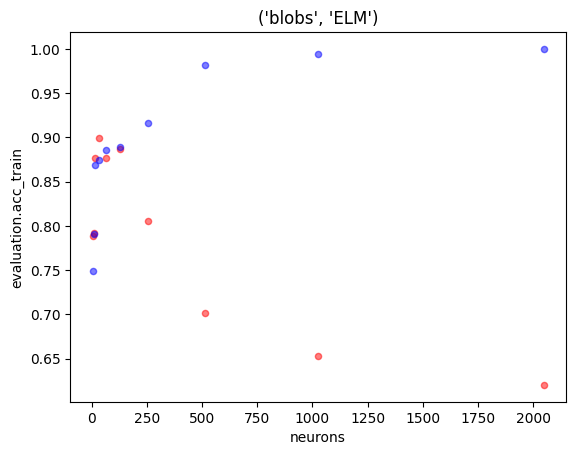

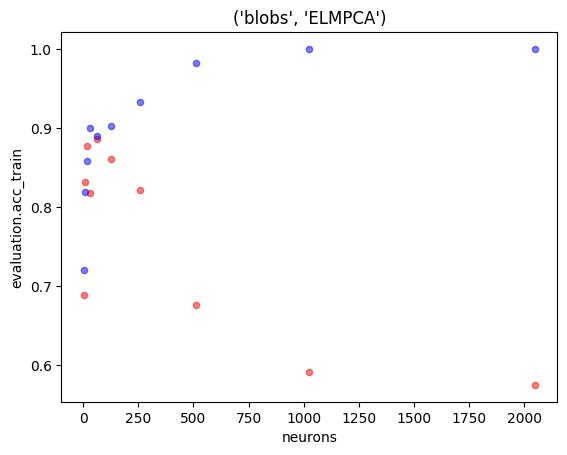

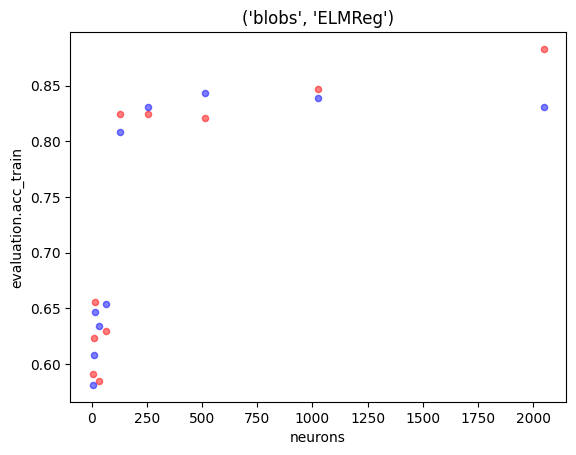

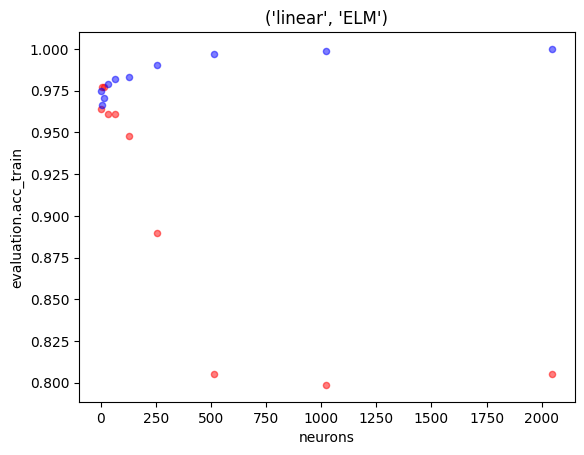

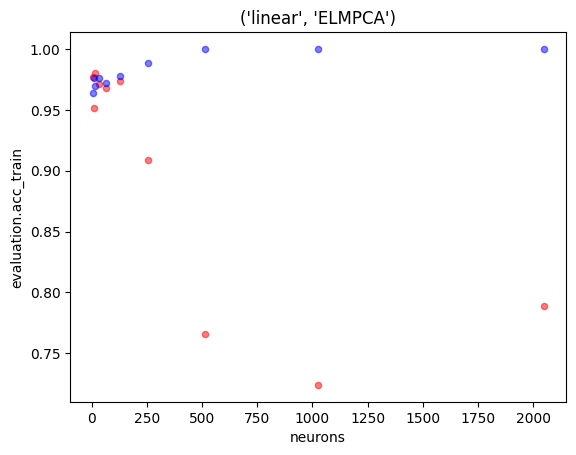

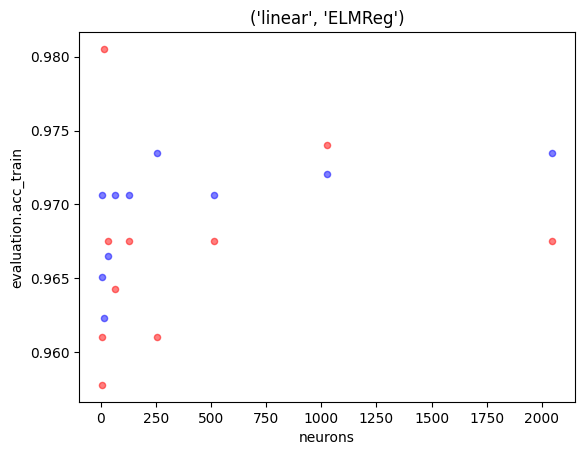

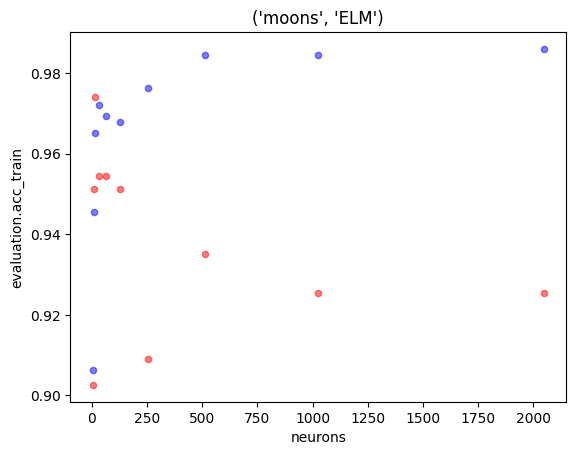

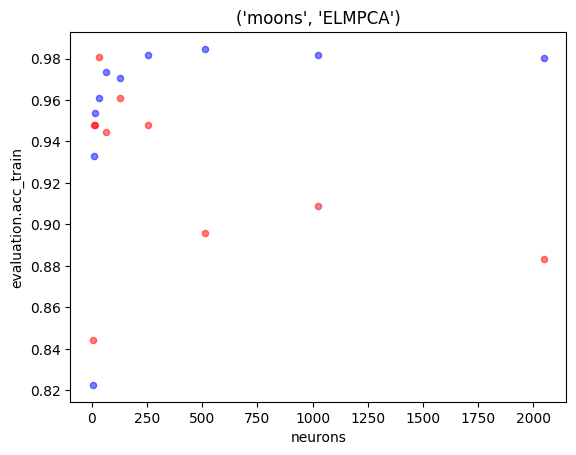

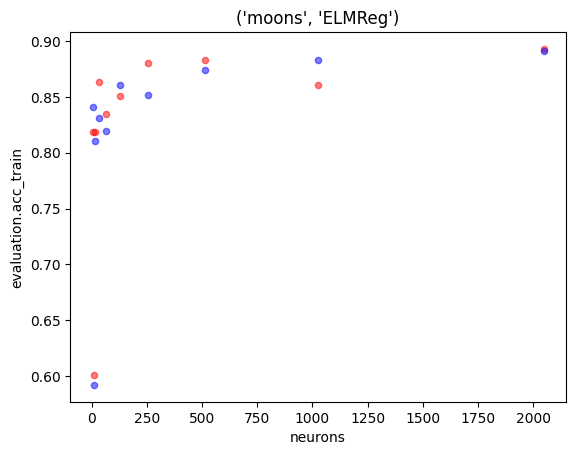

In [25]:
for name, group in df.groupby(["dataset", "model"]):
    ax = plt.gca()
    group.plot.scatter(
        x="neurons", y="evaluation.acc_test",
        color="red", alpha=.5, ax=ax,
    )
    group.plot.scatter(
        x="neurons", y="evaluation.acc_train",
        color="blue", alpha=.5, ax=ax,
    )
    plt.title(name)
    plt.show()
    plt.close()

---